# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [242]:
# Tampilkan 5 baris pertama dengan function head.
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [243]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [244]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [245]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


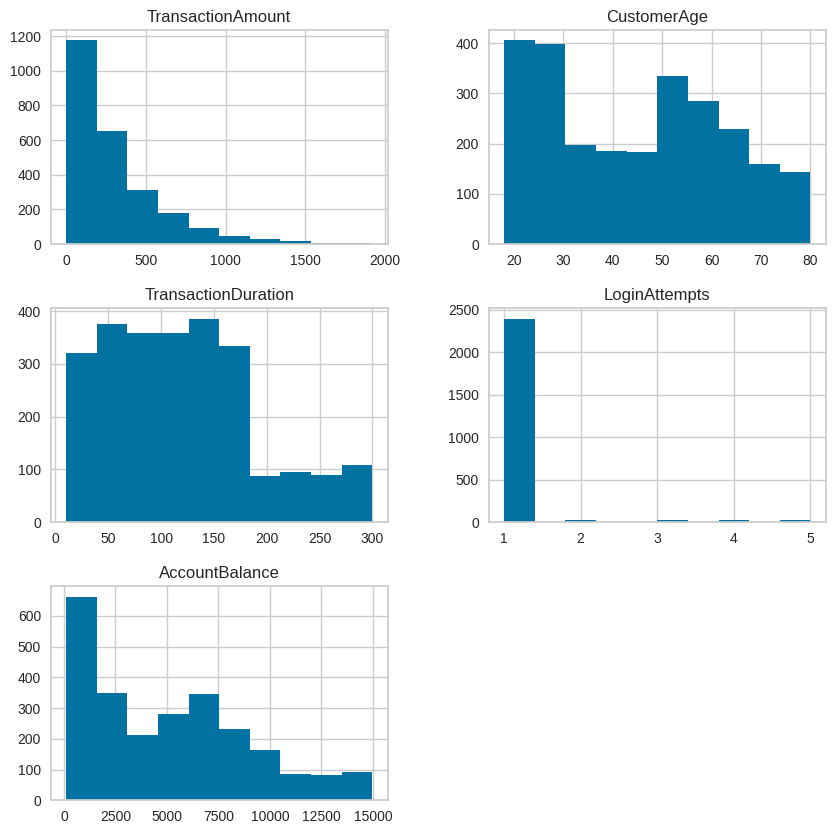

In [246]:
  # Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
  df.hist(figsize=(10, 10))
  plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

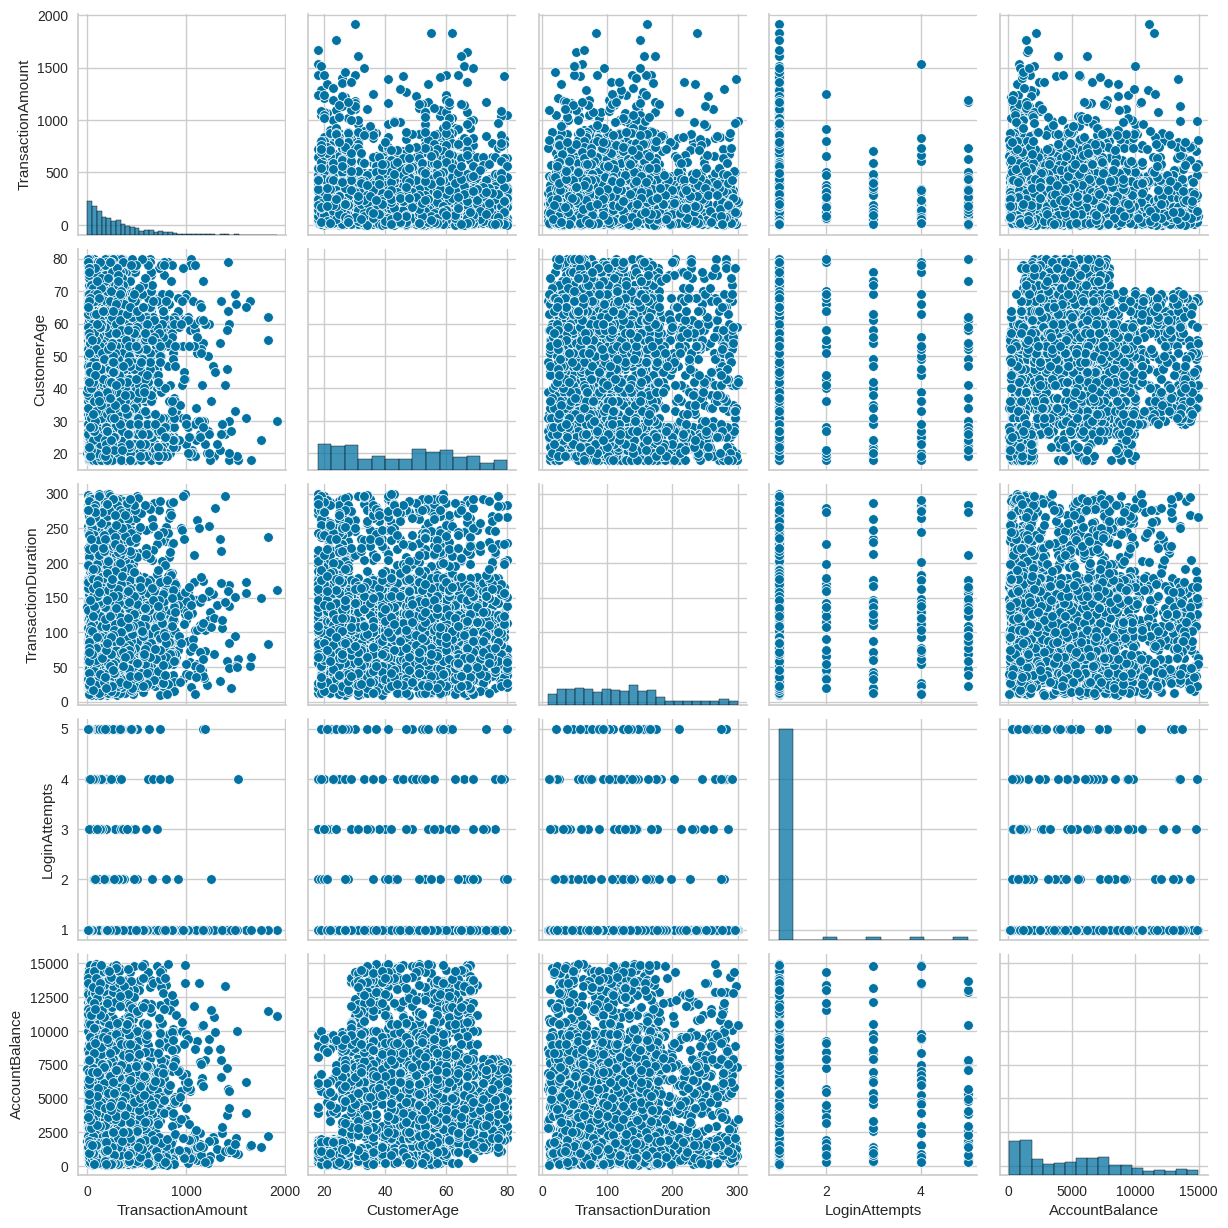

In [247]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [248]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [249]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [250]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = MinMaxScaler()
numeric_colomn = df.select_dtypes(include=['number']).columns
df[numeric_colomn] = scaler.fit_transform(df[numeric_colomn])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [251]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_drop=df.drop(columns=['TransactionID','AccountID','DeviceID','IP Address','MerchantID'])
df_drop.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [252]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df_drop.select_dtypes(include=['object']).columns
encoder_dict = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df_drop[col] = encoder.fit_transform(df_drop[col])
    encoder_dict[col] = encoder
df_drop.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [253]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_drop.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [254]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_drop.fillna(df_drop.mean(), inplace=True)

In [255]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_drop.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [256]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
all_columns = df_drop.columns
# Menghitung nilai kuartil
q1 = df_drop[all_columns].quantile(0.25)
q3 = df_drop[all_columns].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Menemukan data yang melebihi batas atas atau bawah untuk kolom yang sudah di-encode
outliers_encoded = (df_drop[all_columns] < lower_bound) | (df_drop[all_columns] > upper_bound)
# Menampilkan jumlah outlier untuk setiap kolom
print(outliers_encoded.sum())

TransactionAmount          113
TransactionDate              0
TransactionType            593
Location                     0
Channel                      0
CustomerAge                  0
CustomerOccupation           0
TransactionDuration          0
LoginAttempts              141
AccountBalance               0
PreviousTransactionDate      0
dtype: int64


In [257]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df_drop['TransactionAmount_binned'] = pd.cut(df_drop['TransactionAmount'], bins=4, labels=[0, 1, 2, 3])
df_drop['AccountBalance_binned'] = pd.cut(df_drop['AccountBalance'], bins=3, labels=[0, 1, 2])
#Melakukan encode
df_drop['AccountBalance_binned'] = LabelEncoder().fit_transform(df_drop['AccountBalance_binned'])
df_drop['TransactionAmount_binned'] = LabelEncoder().fit_transform(df_drop['TransactionAmount_binned'])

df_drop.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,AccountBalance_binned
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,1
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,1
4,0.006874,1939,0,1,2,0.430297,3,0.648276,0.0,0.492591,16,0,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [258]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_drop.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,AccountBalance_binned
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.155028,1256.121272,0.788072,21.286282,1.010736,0.429579,1.530417,0.377697,0.030671,0.337132,180.846521,0.240954,0.600398
std,0.151664,725.512424,0.436975,12.395592,0.830674,0.286277,1.150287,0.240111,0.148619,0.260618,103.957462,0.535153,0.682023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043180,628.500000,1.000000,11.000000,0.000000,0.145161,0.500000,0.182759,0.000000,0.095324,91.000000,0.000000,0.000000
50%,0.111087,1256.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.358621,0.000000,0.318555,181.000000,0.000000,0.000000
75%,0.213326,1884.500000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.506842,272.000000,0.000000,1.000000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000,3.000000,2.000000


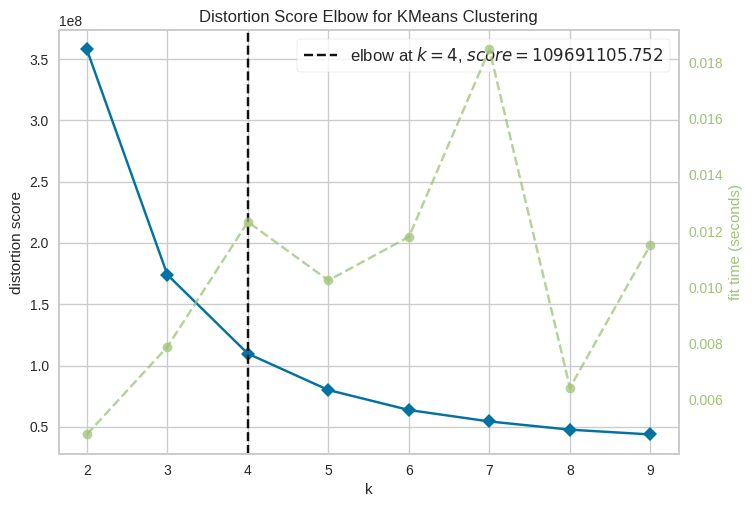

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [259]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
#Mengambil kolom TransactionAMount dan AccountBalance
x = df_drop.iloc[:,[1,10]].values
kmeans = KMeans
visualizer = KElbowVisualizer(kmeans(), k=(2,10))
visualizer.fit(x)
visualizer.show()

In [260]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=4, random_state=42)
model_kmeans.fit(x)

labels = model_kmeans.labels_
df_drop['Cluster'] = labels
df_drop.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_binned,AccountBalance_binned,Cluster
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,1,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,2,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,1,2
4,0.006874,1939,0,1,2,0.430297,3,0.648276,0.0,0.492591,16,0,1,1


Jalankan cell code ini untuk menyimpan model kamu.

In [261]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [262]:
# Menghitung dan menampilkan nilai Silhouette Score.
slht_scr = silhouette_score(x, model_kmeans.labels_)
print(f"Silhouette Score: {slht_scr}")

Silhouette Score: 0.4997673709953685


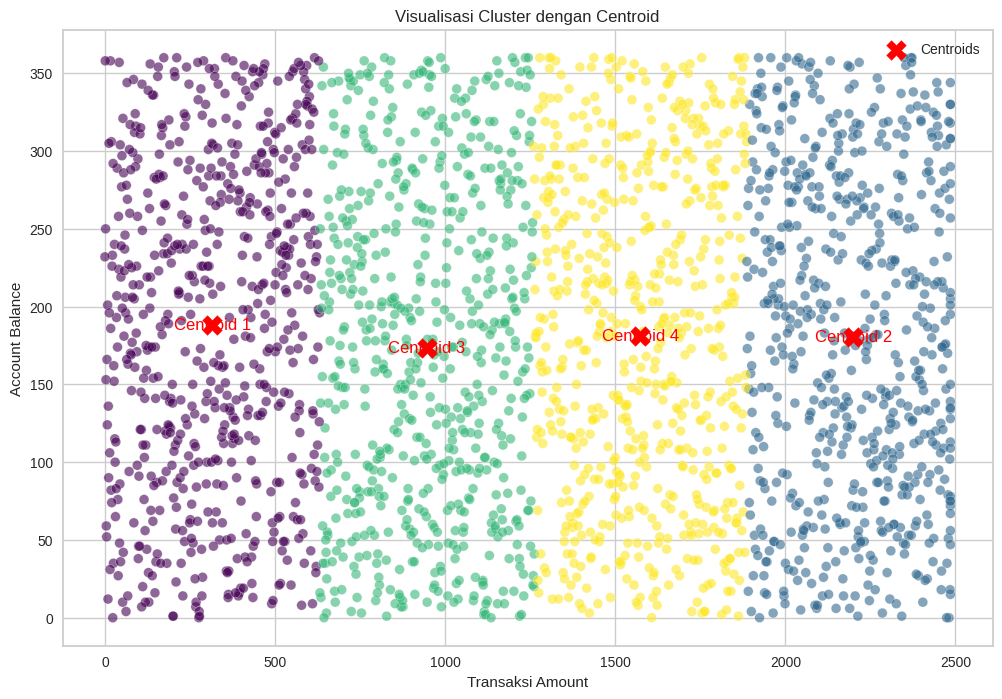

Nilai Centroids:
Centroid 1: Transaksi Amount = 316.00, Account Balance = 188.30
Centroid 2: Transaksi Amount = 2199.31, Account Balance = 180.48
Centroid 3: Transaksi Amount = 946.66, Account Balance = 173.36
Centroid 4: Transaksi Amount = 1574.00, Account Balance = 181.21


In [263]:
# Membuat visualisasi hasil clustering
labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Transaksi Amount')
plt.ylabel('Account Balance')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Transaksi Amount = {centroid[0]:.2f}, Account Balance = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [264]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# ___ = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(___)

In [265]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [266]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

#inverse data
df_inverse = df_drop.copy()
for col in categorical_cols:
    if df_inverse[col].isnull().any():
        # Tangani NaN dulu sebelum inverse (bisa isi dengan dummy atau skip)
        df_inverse[col] = df_inverse[col].fillna(-1)  # atau nilai dummy lain yang valid

df_inverse[numeric_colomn] = scaler.inverse_transform(df_inverse[numeric_colomn])

for col in categorical_cols:
    df_inverse[col] = encoder_dict[col].inverse_transform(df_inverse[col])

# Fungsi agregasi
agg_functions = {col: ['mean', 'min', 'max', 'median', 'std', 'sum'] for col in numeric_colomn}
grouped = df_inverse.groupby('Cluster').agg(agg_functions)


# Menampilkan hasil
print(grouped)

        TransactionAmount                                                    \
                     mean   min      max  median         std            sum   
Cluster                                                                       
0              295.274971  0.86  1830.00  224.25  281.398154  186613.781740   
1              292.346676  0.26  1647.74  210.45  291.634833  183301.365870   
2              281.279416  1.41  1919.11  199.09  271.799220  177487.311740   
3              322.240398  0.32  1831.02  220.23  316.739811  201400.248805   

        CustomerAge                     ... LoginAttempts                   \
               mean   min   max median  ...           max median       std   
Cluster                                 ...                                  
0         43.612398  18.0  80.0   42.5  ...           5.0    1.0  0.648996   
1         44.762986  18.0  80.0   46.0  ...           5.0    1.0  0.601430   
2         45.065032  18.0  80.0   46.0  ...           5.


## **Analisis Karakteristik Klaster Berdasarkan Data Asli (Post-Inverse)**

###  **Cluster 0**

* **TransactionAmount**:

  * *Mean:* 295.27 | *Range:* 0.86 – 1830.00
  * *Interpretasi:* Mayoritas transaksi tergolong **menengah ke tinggi**, namun terdapat **nilai ekstrim rendah**, mungkin karena transaksi kecil seperti pulsa/data atau pengembalian saldo.
* **CustomerAge**:

  * *Mean:* 43.6 tahun | *Range:* 18 – 80
  * Ini menunjukkan kelompok usia **dewasa produktif**, kemungkinan klaster pekerja aktif.
* **LoginAttempts**:

  * *Median:* 1 | *Max:* 5
  * Cenderung login lancar, bisa jadi kelompok ini **paham teknologi** atau terbiasa dengan platform.
* **AccountBalance**:

  * *Mean:* 5126.05 | *Max:* 14,942.78
  * Termasuk kategori **menengah atas**, dengan distribusi cukup lebar (std ≈ 3,888), menunjukkan **variasi finansial** yang besar dalam klaster ini.

###  **Cluster 1**

* **TransactionAmount**:

  * *Mean:* 292.35 | *Range:* 0.26 – 1647.74
  * Cenderung mirip Cluster 0, tetapi nilai maksimum sedikit lebih kecil. Rentang dan sebaran (std) hampir identik.
* **CustomerAge**:

  * *Mean:* 44.76 tahun
  * Usia sedikit lebih tua daripada cluster 0, bisa jadi lebih berpengalaman secara finansial.
* **LoginAttempts**:

  * Masih dominan pada 1 login attempt, menunjukkan **penggunaan aplikasi secara efisien**.
* **AccountBalance**:

  * *Mean:* 5222.13
  * Nilai **lebih tinggi dari cluster 0**, tapi perbedaan tidak signifikan. Artinya ini **demografi serupa tapi kemungkinan memiliki kepercayaan/platform awareness lebih tinggi.**

### **Cluster 2**

* **TransactionAmount**:

  * *Mean:* 281.28 | *Max:* 1919.11
  * Agak **lebih rendah** dibanding Cluster 0 & 1. Bisa jadi ini pengguna yang lebih hemat atau bertransaksi lebih jarang.
* **CustomerAge**:

  * *Mean:* 45.07
  * **Usia lebih tua** dari semua cluster lainnya – mungkin pensiunan, atau segmen “senior user”.
* **AccountBalance**:

  * *Mean:* 5042.19 | *Std:* 3990.32
  * Saldo rata-rata **sedikit lebih rendah**, dengan sebaran besar → bisa mencerminkan pengguna **high net worth individuals** bercampur dengan yang lebih low-income.

###  **Cluster 3**

* **TransactionAmount**:

  * *Mean:* 322.24 | *Max:* 1831.02
  * **Tertinggi dari semua klaster**. Pengguna dalam klaster ini cenderung **aktif bertransaksi dalam jumlah besar**.
* **CustomerAge**:

  * *Mean:* 45.10
  * Usia relatif tua, tetapi hampir identik dengan Cluster 2.
* **AccountBalance**:

  * *Mean:* 5076.61
  * Nilai stabil dengan std lebih rendah dari cluster lainnya. Artinya pengguna cluster ini mungkin **lebih stabil secara finansial**, dan memiliki **pola transaksi yang konsisten.**


 **Kesimpulan.**

| Cluster | Usia Rata-rata | Transaksi Rata-rata | Saldo Rata-rata | Karakteristik Kunci                       |
| ------- | -------------- | ------------------- | --------------- | ----------------------------------------- |
| 0       | 43.6           | 295.27              | 5,126           | Dewasa aktif, pengguna umum               |
| 1       | 44.76          | 292.35              | 5,222           | Mirip Cluster 0 tapi lebih mature         |
| 2       | 45.07          | 281.28              | 5,042           | Senior, hemat, stabil                     |
| 3       | 45.10          | **322.24**          | 5,076           | **Paling aktif & stabil secara keuangan** |

---

Kalau lu mau, gua bisa bantu bikinin tabel ringkasan visual-nya juga.
Atau lu mau lanjut ke **insight bisnis** atau **strategi segmentasi marketing** dari hasil ini? Gua siap! 🧠📈


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [267]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_drop.rename(columns={'Cluster': 'Target'}, inplace=True)

In [268]:
# Simpan Data
df_drop.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [269]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [270]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [271]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [272]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [273]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.